# 1. Load Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree


2024-11-07 23:05:53.453646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = R'/Users/shaquillelee/Documents/Specialization /Datasets'

In [3]:
weather_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_cleaned.csv'), index_col = 0)
pleasant_df = pd.read_csv(os.path.join(path, 'Prepared Data', 'pleasant_cleaned.csv'), index_col = 0)

In [5]:
weather_df.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [6]:
weather_df.shape

(22950, 135)

In [8]:
pleasant_df.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [9]:
pleasant_df.shape

(22950, 15)

In [10]:
# Select columns that start with 'BASEL'
debilt_columns = weather_df.columns[weather_df.columns.astype(str).str.startswith('DEBILT')]

# Create a new DataFrame with only those columns
debilt_df = weather_df[debilt_columns]

In [11]:
debilt_df.head()

DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14                  0.06              0.1   
2                     0.28                  0.01              3.0   
3                     0.08                  0.09              0.0   
4                     0.04                  0.39              0.0   

   DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  
0               9.3              7.4             11.0  
1               7.7              6.4              8.3  
2               6.8              4.6              9.9  
3               6.7              3.6             10.1  
4               8.0              2.4             11.2

In [12]:
debilt_df.shape

(22950, 9)

In [13]:
# Select columns that start with 'BASEL'
debilt_column  = pleasant_df.columns[pleasant_df.columns.astype(str).str.startswith('DEBILT')]

# Create a new DataFrame with only those columns
debilt_pleasant = pleasant_df[debilt_column]


In [14]:
debilt_pleasant.head()

DEBILT_pleasant_weather
0                        0
1                        0
2                        0
3                        0
4                        0

In [56]:
debilt_pleasant.shape

(22950, 1)

In [17]:
#Reshaping and modelling 
X = debilt_df
y = debilt_pleasant
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)
y_test

In [60]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

/Users/shaquillelee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [61]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8098039215686275


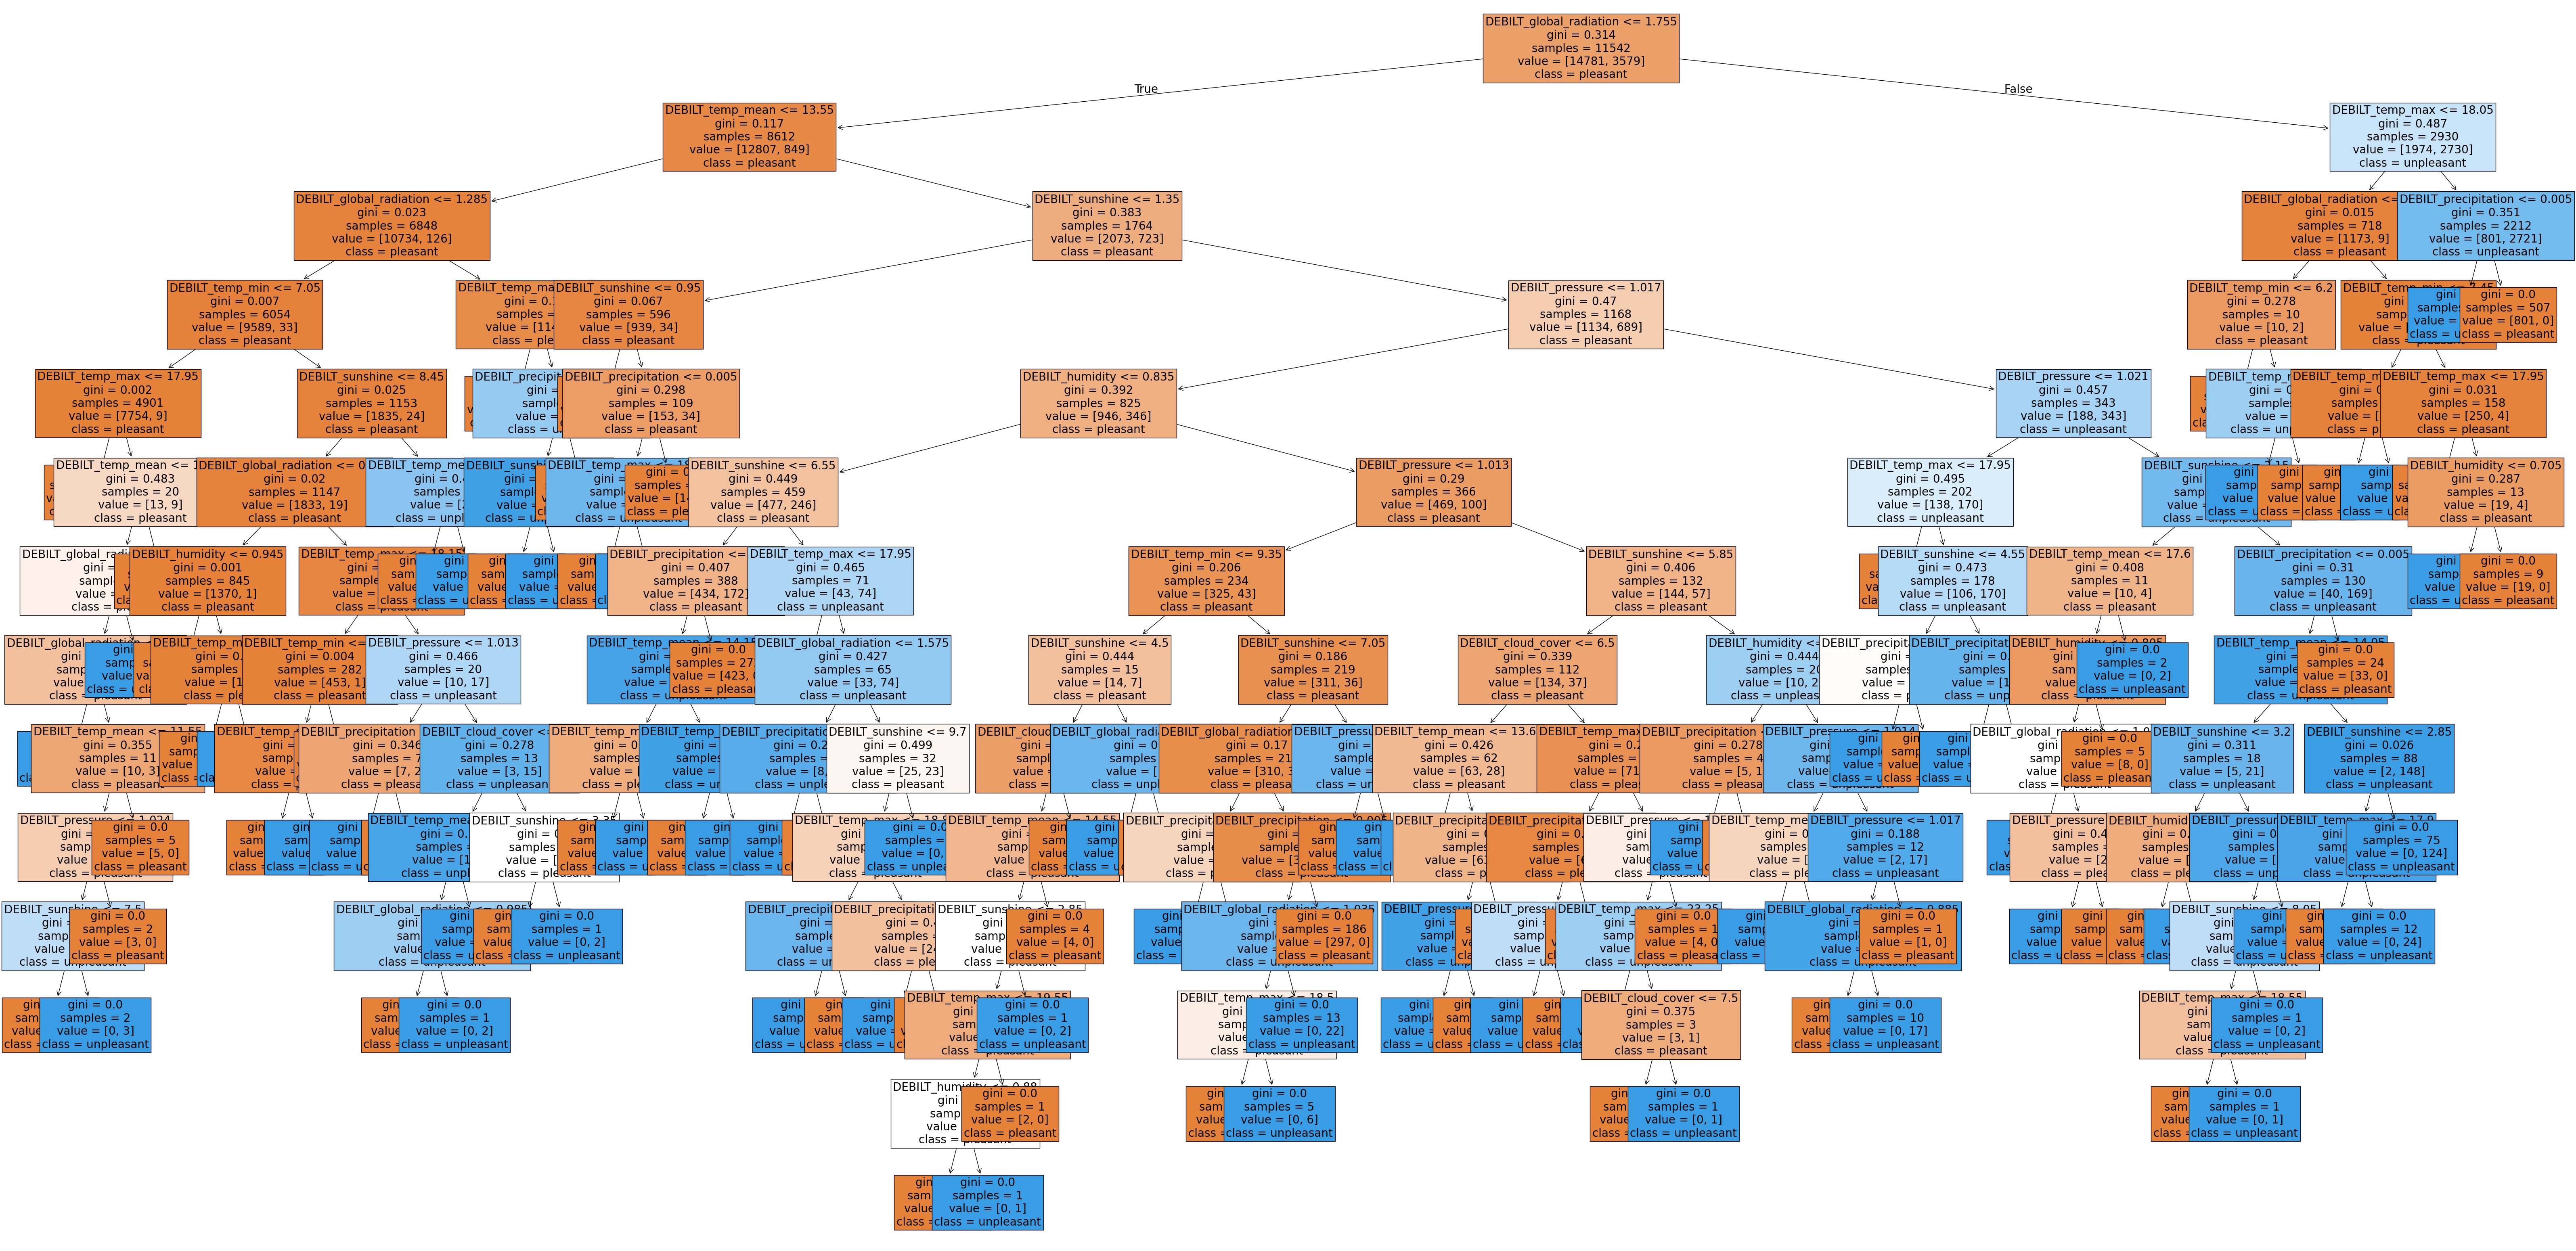

In [65]:
#Plot random forest for deblit
fig1 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[30], fontsize = 20, feature_names = debilt_df.columns, class_names=['pleasant', "unpleasant"], filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

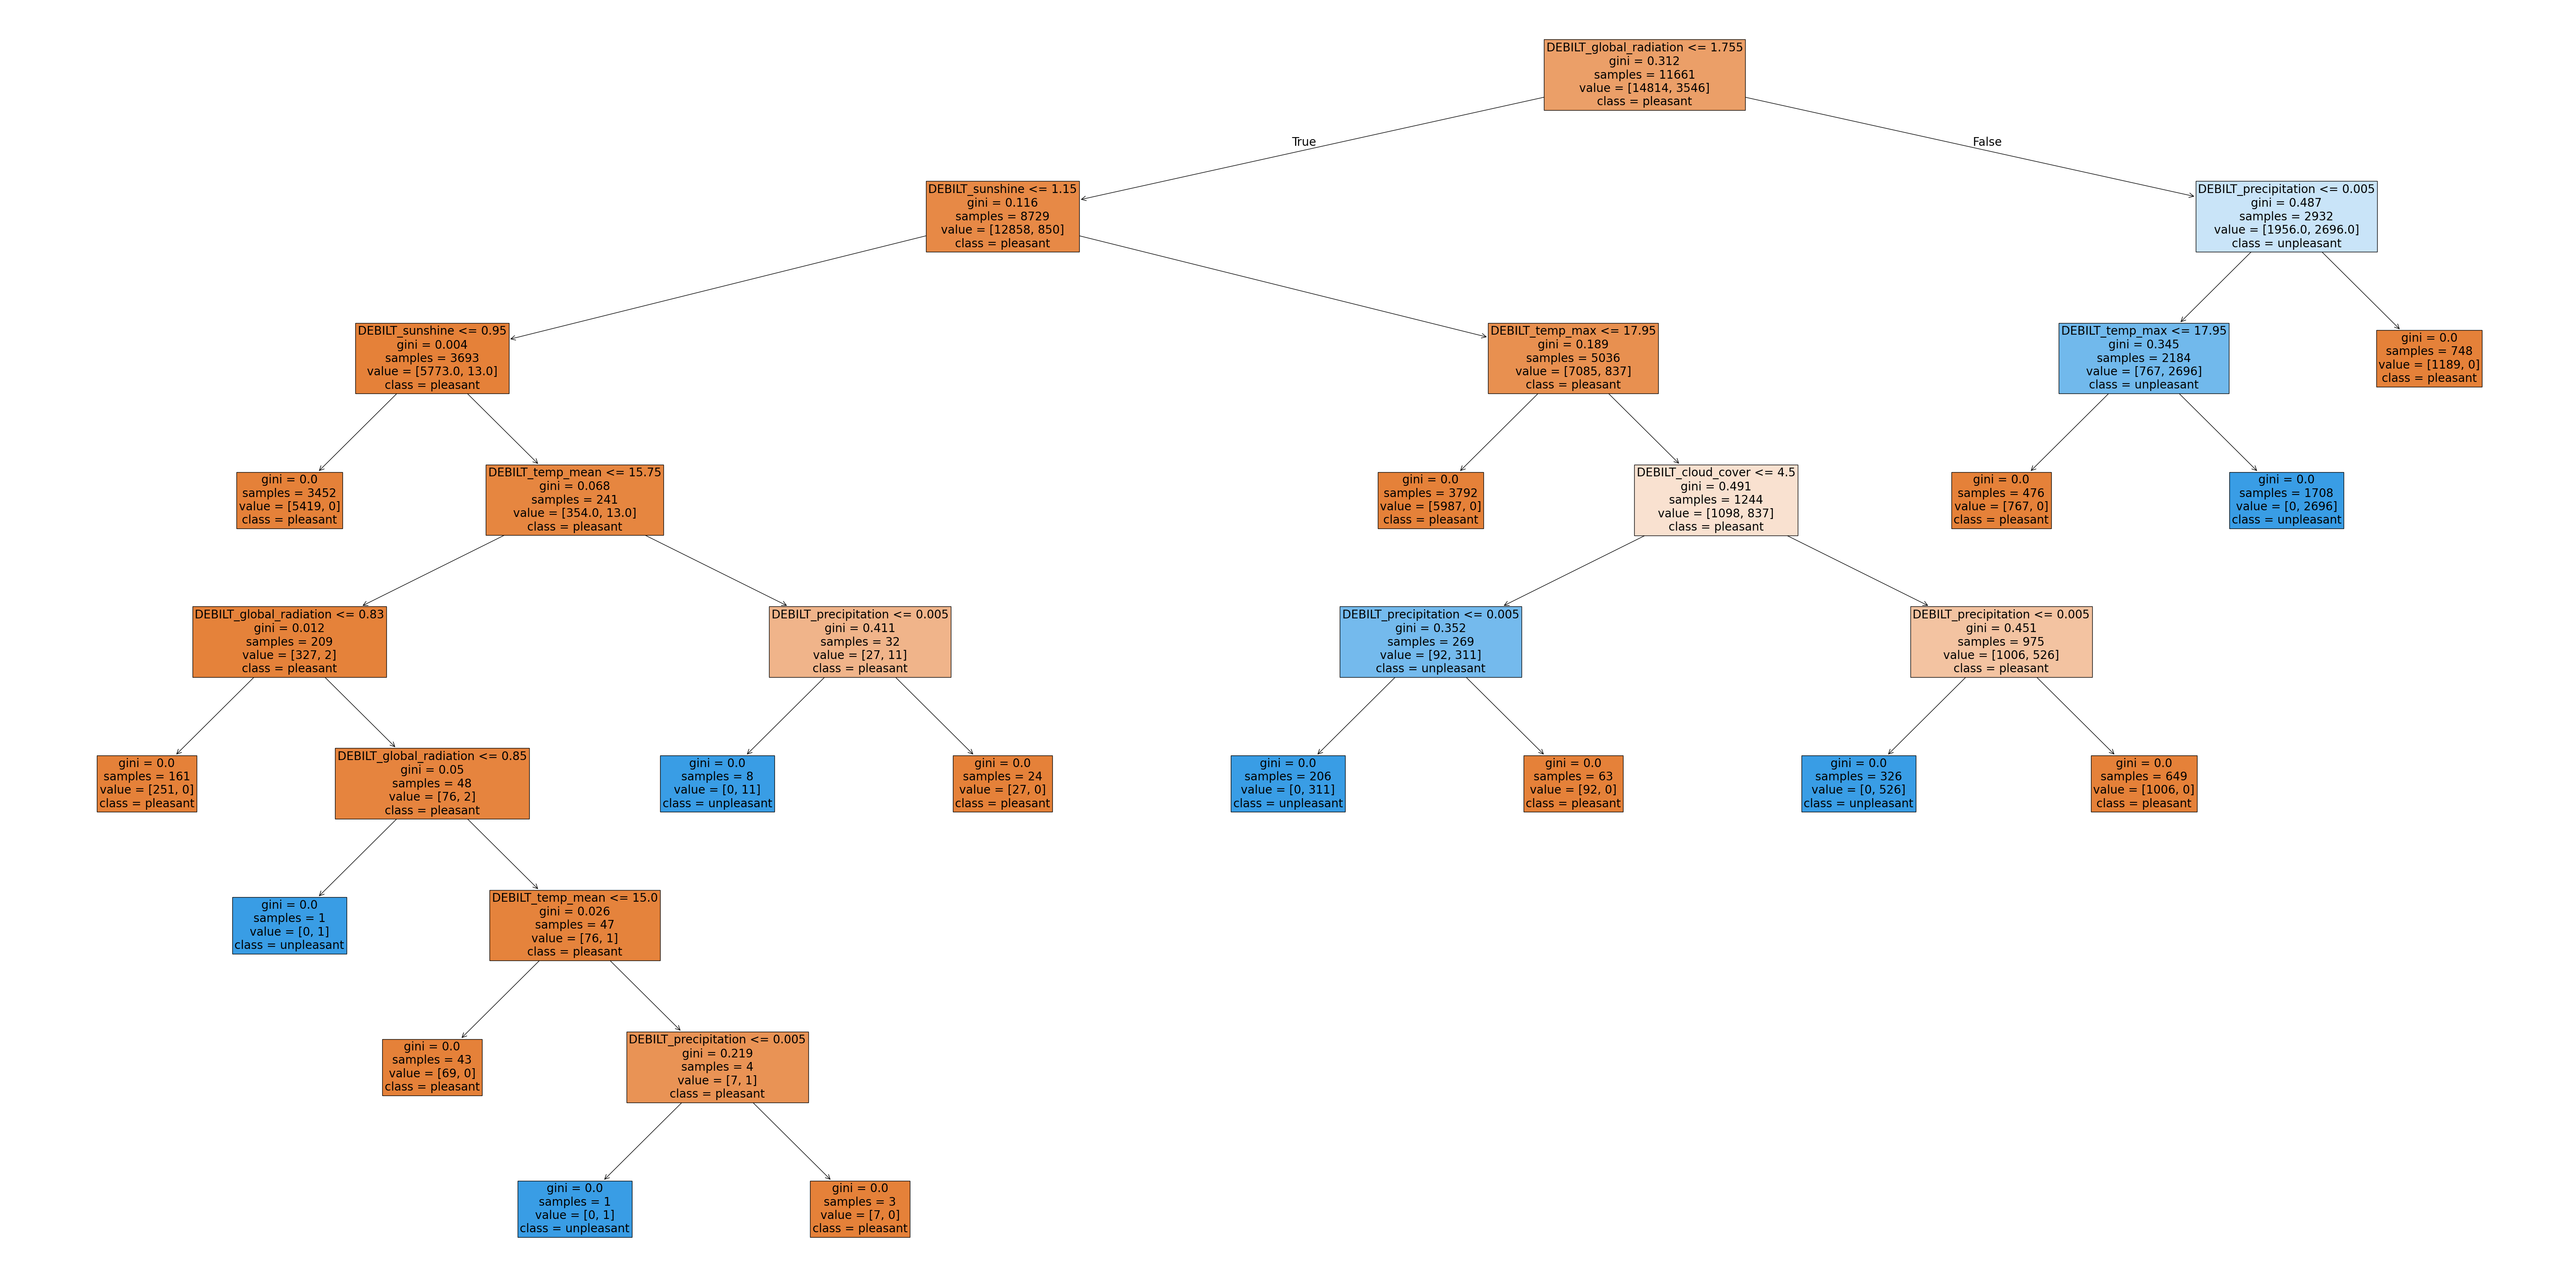

In [70]:
#Plot random forest for deblit
fig1 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, feature_names = debilt_df.columns, class_names=['pleasant', "unpleasant"], filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [71]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02653871, 0.01103786, 0.01296872, 0.09848089, 0.33718719,
       0.06594175, 0.09539558, 0.01934734, 0.33310196])

In [72]:
np.set_printoptions(threshold=1000)

In [73]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [74]:
# Create a dataframe to associate observation measurements with their importances
importances_df = pd.DataFrame({
    'Measurement': measurements,
    'Importance': newarray
})

In [75]:
# Sort by importance for chart readability
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df)

Feature Importance:
        Measurement  Importance
4     precipitation    0.337187
8          temp_max    0.333102
3  global_radiation    0.098481
6         temp_mean    0.095396
5          sunshine    0.065942
0       cloud_cover    0.026539
7          temp_min    0.019347
2          pressure    0.012969
1          humidity    0.011038


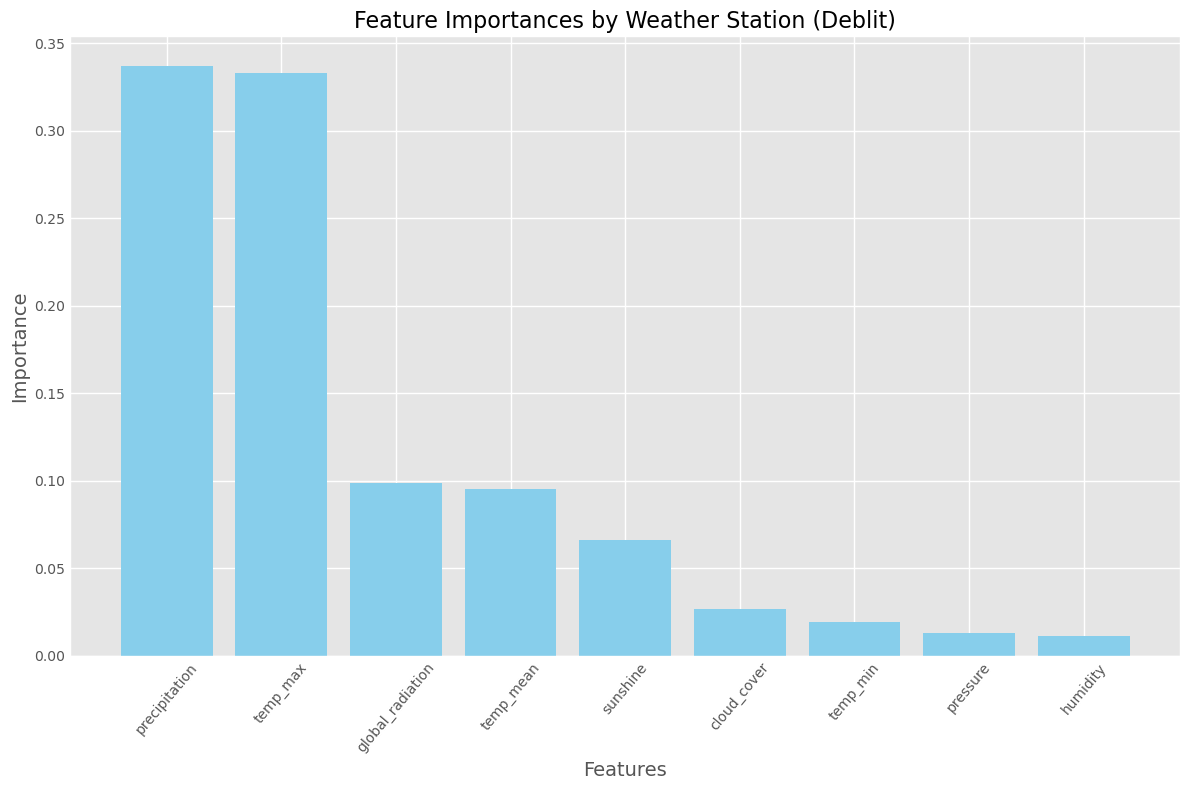

In [80]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(importances_df['Measurement'], importances_df['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (Deblit)', fontsize=16)
plt.tight_layout()
plt.show()